## Sidneyville Manufacturing: Pythonic Version

In [2]:
# import Glop package
from ortools.linear_solver import pywraplp as glp
import lptools as lpt

In [3]:
#Create LP model object
mymodel = glp.Solver('Suits',glp.Solver.GLOP_LINEAR_PROGRAMMING)

In [3]:
inf = mymodel.infinity()

variables = {'Roll_Top': (0, inf, 115),    # (lower bound, upper bound, objective coefficient)
             'Regular':  (0, inf,  90)}

constraints = {'Pine':  (-inf, 200, [10, 20]),    # (lower bound, upper bound, coefficient list)
               'Cedar': (-inf, 128, [ 4, 16]),
               'Maple': (-inf, 220, [15, 10])}

In [4]:
# Create Variables and Objective

mymodel.Objective().SetMaximization()

for v in variables:
#     print(v)
#     print(variables[v])
    (lb,ub,c) = variables[v]
    var = mymodel.NumVar(lb, ub, v)
    mymodel.Objective().SetCoefficient(var, c)
    

In [5]:
lpt.print_model(mymodel)

Variables:
Roll_Top, Regular 

maximize: 115.0*Roll_Top + 90.0*Regular 

Subject To:

Bounds:
Roll_Top >= 0.0
Regular >= 0.0


In [6]:
# Create Constraints

for c in constraints:
    (lb,ub,coeff_lst) = constraints[c]
    constr = mymodel.Constraint(lb,ub,c)
    
    for (v,coeff) in zip(mymodel.variables(),coeff_lst):
        constr.SetCoefficient(v,coeff)


In [7]:
lpt.print_model(mymodel)

Variables:
Roll_Top, Regular 

maximize: 115.0*Roll_Top + 90.0*Regular 

Subject To:
Pine: 10.0*Roll_Top + 20.0*Regular <= 200.0
Cedar: 4.0*Roll_Top + 16.0*Regular <= 128.0
Maple: 15.0*Roll_Top + 10.0*Regular <= 220.0

Bounds:
Roll_Top >= 0.0
Regular >= 0.0


In [14]:
#solve model and display results
status = mymodel.Solve()
print('Solution Status =',status )
print('Optimal Value = %.2f' %  mymodel.Objective().Value())
for v in mymodel.variables():
    print('%s = %.2f' % (v.name() , v.solution_value()))

Solution Status = 0
Optimal Value = 1740.00
Roll_Top = 12.00
Regular = 4.00


In [17]:
# display variable information
print('Variable    LB   Value    UB   Reduced Cost')
for v in mymodel.variables():
    print('%8s  %5.1f  %5.1f  %5.1f  %5.2f' % (v.name() ,v.lb() ,v.solution_value() ,v.ub() ,v.reduced_cost()))

Variable    LB   Value    UB   Reduced Cost
Roll_Top    0.0   12.0    inf   0.00
 Regular    0.0    4.0    inf   0.00


In [23]:
#display constraint information
print('Constraint    LB    Value  UB     Dual')
for (c,lhs) in zip(mymodel.constraints(),mymodel.ComputeConstraintActivities()):
    print('%10s  %5.1f  %5.1f  %5.1f  %5.2f' % (c.name() ,c.lb() ,lhs ,c.ub() ,c.dual_value() ))

Constraint    LB    Value  UB     Dual
      Pine   -inf  200.0  200.0   1.00
     Cedar   -inf  112.0  128.0  -0.00
     Maple   -inf  220.0  220.0   7.00


Analysis

In [24]:
import matplotlib.pyplot as plt

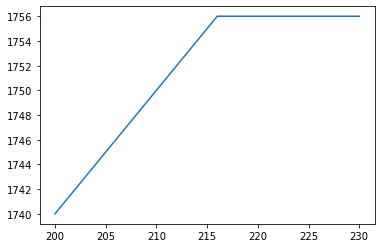

In [25]:
# parameter analysis for pine
param_lst =list(range(200,231))
optval_lst = list()
constr = mymodel.constraints()[0]
for b in param_lst:
    constr.SetUb(b)
    mymodel.Solve()
    optval_lst.append(mymodel.Objective().Value())
plt.plot(param_lst,optval_lst)